In [1]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


In [124]:
import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile 
import librosa, librosa.display
from scipy.fft import rfft, rfftfreq
from scipy.signal import stft

In [19]:
# the file name output you want to record into
filename = "vocales1.wav"
# set the chunk size of 1024 samples
chunk = 1024
# sample format
FORMAT = pyaudio.paInt16
# mono, change to 2 if you want stereo
channels = 1
# 44100 samples per second
sample_rate = 44100
record_seconds = 6
# initialize PyAudio object
p = pyaudio.PyAudio()
# open stream object as input & output
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Recording...")
for i in range(int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    # if you want to hear your voice while recording
    # stream.write(data)
    frames.append(data)
print("Finished recording.")
# stop and close stream
stream.stop_stream()
stream.close()
# terminate pyaudio object
p.terminate()
# save audio file
# open the file in 'write bytes' mode
wf = wave.open(filename, "wb")
# set the channels
wf.setnchannels(channels)
# set the sample format
wf.setsampwidth(p.get_sample_size(FORMAT))
# set the sample rate
wf.setframerate(sample_rate)
# write the frames as bytes
wf.writeframes(b"".join(frames))
# close the file
wf.close()

Recording...
Finished recording.


In [51]:
sound_file = 'vocales1.wav'
ipd.Audio(sound_file)

In [71]:
vocales, vocales_sr = librosa.load(sound_file, sr = None ) #se pone none por que queremos la frecuencia
#que ya teiene el audio
print('La frecuencia de muestreo de las vocales son:', vocales_sr )

La frecuencia de muestreo de las vocales son: 44100


In [25]:
way_obj = wave.open(sound_file, 'rb')

In [28]:
sample_freq = way_obj.getframerate()
sample_freq

44100

In [31]:
signal_wave = way_obj.readframes(sample_freq)
len(signal_wave )

88200

In [34]:
signal_array = np.frombuffer(signal_wave, dtype= np.int16, count=-1)

In [78]:
frecuencia_muestreo, data = wavfile.read(sound_file)

In [82]:
signal_array = np.frombuffer(signal_wave, dtype= np.int16, count=-1)

In [86]:
data.shape

(264192,)

In [91]:
duracion  = len(data)/frecuencia_muestreo
duracion 

5.990748299319728

In [94]:
tiempo =np.linspace(0, duracion , len(data))

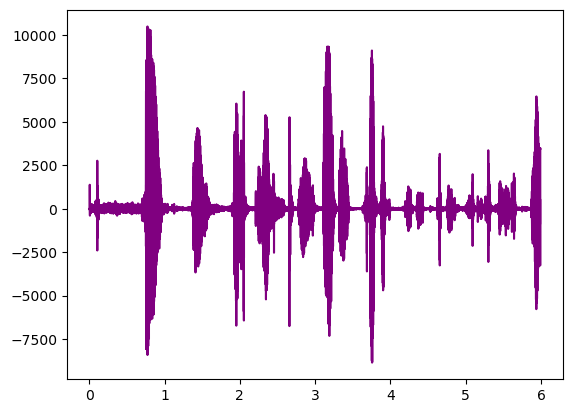

In [185]:
plt.plot(tiempo, data, color = 'purple')
plt.savefig("Frecuencia.jpg")
plt.show()

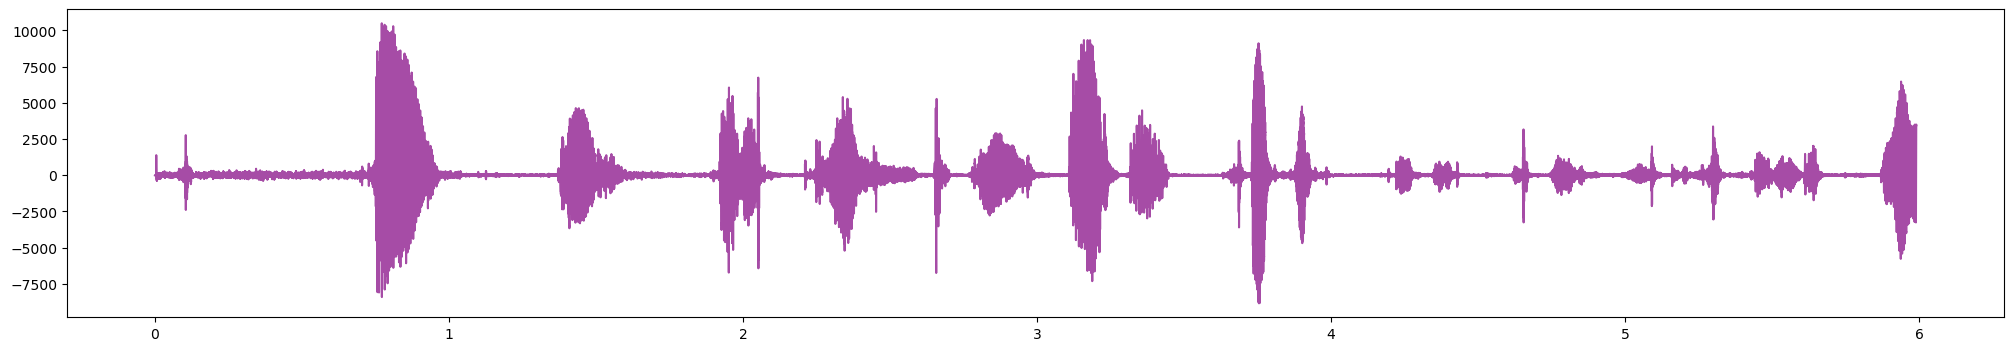

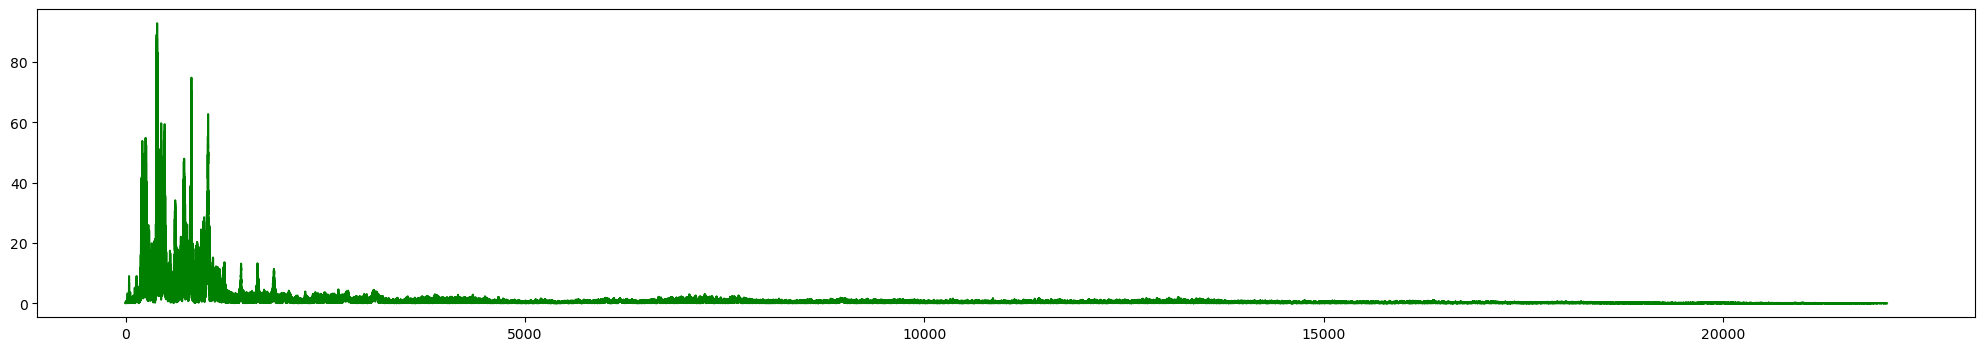

In [203]:
#Transformada de fourier
N = len(data)
xf = rfftfreq(N, 1/frecuencia_muestreo) #(#numero total de muestras, periodo)
yf = rfft(data) #transformada de fourier compleja
psd = 2*np.abs(yf)/N

plt.figure(figsize = (25,4))
plt.plot(tiempo, data, color = 'purple', alpha = 0.7)
plt.figure(figsize = (25,4))
plt.plot(xf, psd, color = 'green')
#plt.savefig("Transformada de fourier compleja.jpg")
plt.show()
#La segunda grafica es la transformada de fourier de la primera 

In [137]:
f, t_stft, Zxx = stft(data, frecuencia_muestreo, nperseg=2**9)

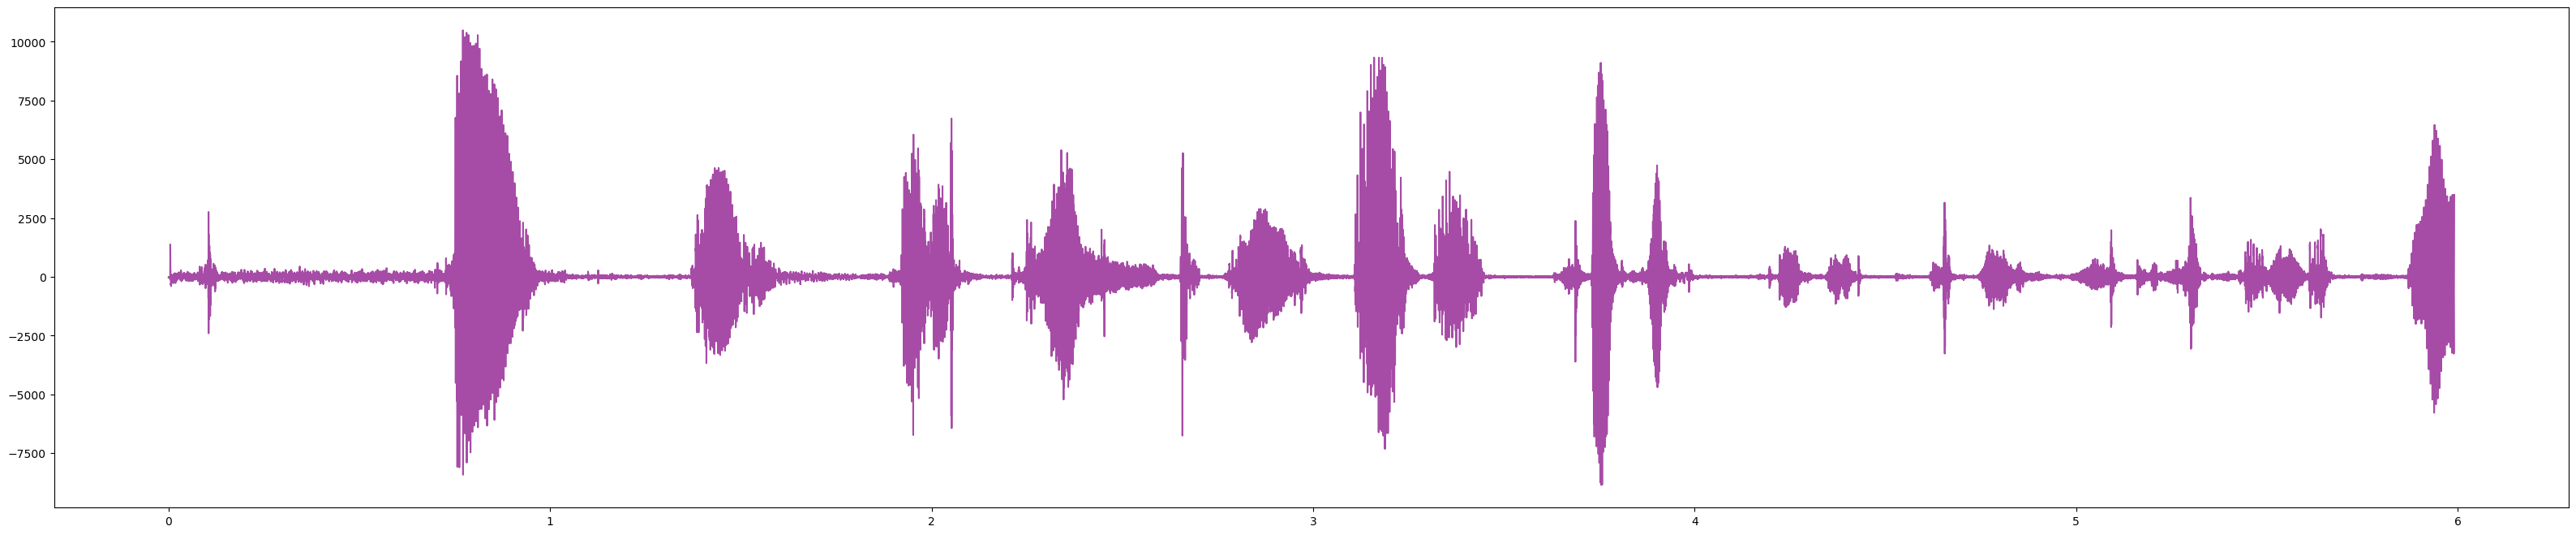

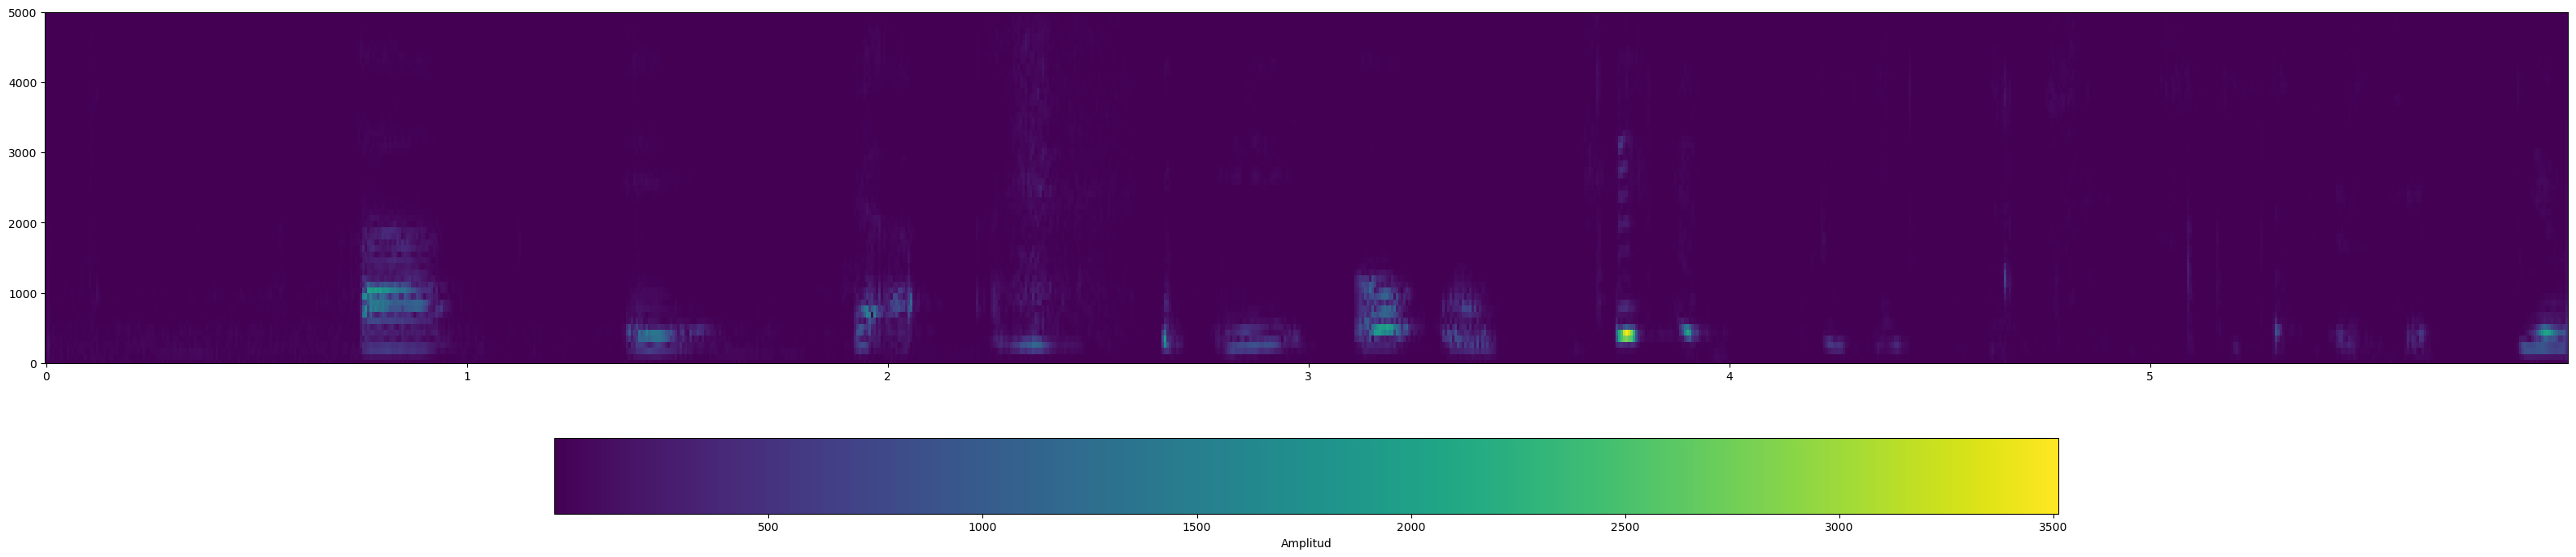

<Figure size 640x480 with 0 Axes>

In [215]:
plt.figure(figsize = (40,8))
plt.plot(tiempo, data, color = 'purple', alpha = 0.7)
plt.figure(figsize = (40,8))
plt.pcolormesh(t_stft, f, np.abs(Zxx)) #el color nos va a dar el 
plt.savefig("Transfomada de fourier2.jpg")
#equivalente a la coordenada del eje x en las transformada de 
#fourier
plt.colorbar(label = 'Amplitud' , orientation = 'horizontal')
plt.ylim(0,5000)
plt.show()
plt.savefig("Transfomada de fourier.jpg")

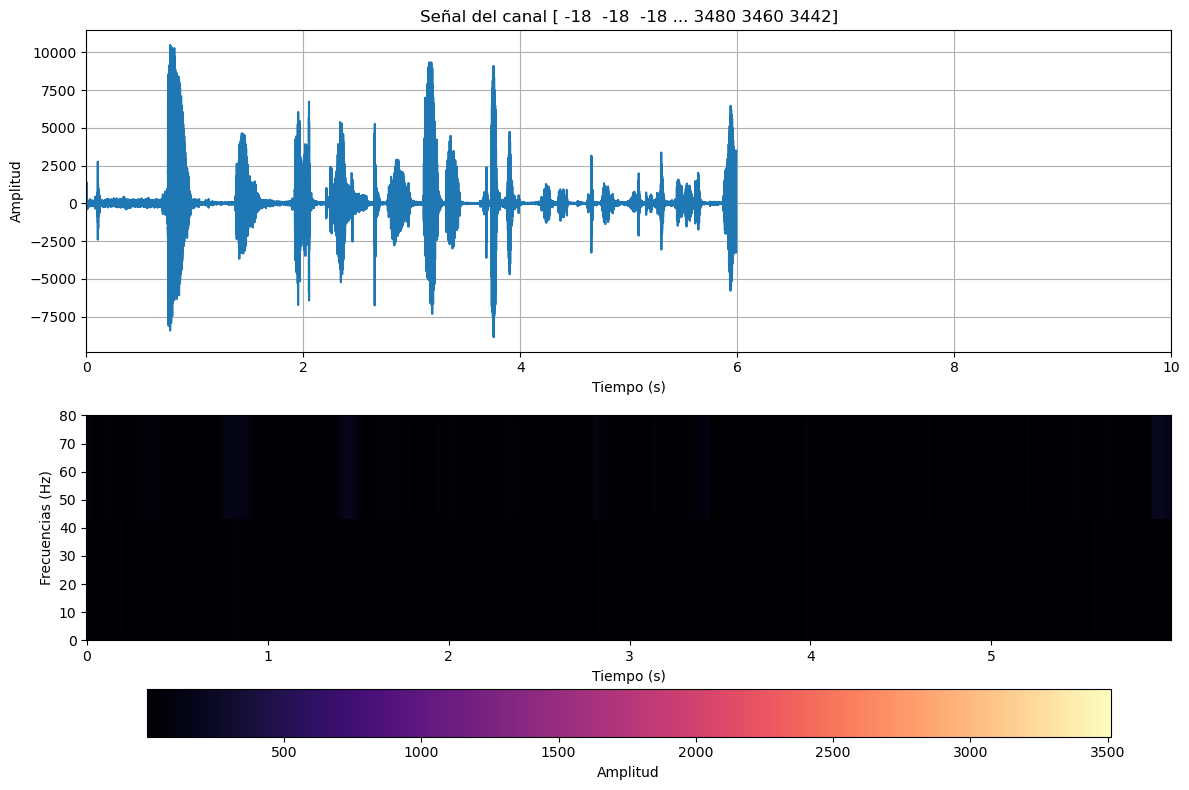

In [164]:
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
plt.plot(tiempo, data)
plt.title(f'Señal del canal {data}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,10)
plt.grid(True)

plt.subplot(2,1,2)
plt.pcolormesh(t_stft, f, np.abs(Zxx), cmap = 'magma')
plt.colorbar(label = 'Amplitud', orientation = 'horizontal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencias (Hz)')
plt.ylim(0,80)

plt.tight_layout()
plt.show
plt.savefig("Señal del canal.jpg")